# **BIKE ASSIGNMENT**


---



**PROBLEM STATEMENT:**

  - ***`A bike-sharing system provides shared bikes to individuals for a fee or free, usually through computer-controlled docks. BoomBikes, a US provider, is struggling due to the pandemic. They aim to boost revenue post-lockdown by understanding future shared bike demand in the American market. The company has hired a consulting firm to analyze the factors influencing shared bike demand in the American market. They seek to determine the significant variables that predict bike demand and how accurately these variables explain the demand levels.`***

# **1. Reading and Understanding the data**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Importing necessary libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

## Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Importing and reading the dataset into dataframe
path = "/content/drive/MyDrive/Dataset/day.csv"
bike_dt = pd.read_csv(path)

In [4]:
## Settings to display output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [5]:
bike_dt.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
### shape of the dataframe
bike_dt.shape

(730, 16)

In [7]:
## Checking all the columns
bike_dt.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [8]:
## Checking numerical columns statistics
bike_dt.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
## bike information
bike_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
## 'instant' is a unnecessary record index.
## 'dteday' has date, for which we have seperate columns as 'year', 'month' & 'weekday'. It doesn't bring any new information.
## 'casual' & 'registered' has no purpose in the target variable 'cnt' as 'cnt' is the addition of the casual & registered columns.
## These two columns are the no. of bikes rented out by different customers & doesn't provide any useful insights in model building.

## Hence dropping these columns
bike_dt.drop(["instant", "dteday", "casual", "registered"], axis=1, inplace=True)

In [11]:
bike_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
bike_dt.shape                     ## 730 rows and 12 columns.

(730, 12)

In [13]:
## Relabeling columns for improved clarity
bike_dt.rename(columns={'season':'Season', 'yr':'Year', 'mnth':'Month', 'hum':'Humidity',
                   'workingday':'Working_day', 'holiday':'Holiday', 'weekday':'Weekday',
                   'temp':'Temperature', 'atemp': 'Feel_temp','windspeed':'Wind_speed',
                   'weathersit':'Weather', 'cnt':'Total_rental_bikes'}, inplace=True)

In [14]:
## Checking assigned names
bike_dt.head(10)

,Season,Year,Month,Holiday,Weekday,Working_day,Weather,Temperature,Feel_temp,Humidity,Wind_speed,Total_rental_bikes
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [15]:
## Checking columns for "NULL values"
bike_dt.isnull().sum()

,0
Season,0
Year,0
Month,0
Holiday,0
Weekday,0
Working_day,0
Weather,0
Temperature,0
Feel_temp,0
Humidity,0


***INSIGHTS:***
- ***`730 rows and 12 columns.`***
- ***`From data, we understood that:`***
    - *`instant is a record index, this column can be removed.`*
    - *`dteday is date column and we already have month and year columns in dataframe. thus we can drop dteday column as it not bringing any new information.`*
    - *`addition of casual and registered columns gives Total_rental_bikes column, and we will not going to get much information from these columns, thus we wil drop these two as well.`*
- ***`There are no missing/null values.`***
- ***`TARGET variable/column is 'Total_rental_bikes'`***




***`Changing binary values into categorical columns`***



In [16]:
bike_dt["Season"].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)

In [17]:
bike_dt["Season"].value_counts()

,count
Season,
Fall,188
Summer,184
Spring,180
Winter,178


In [18]:
bike_dt["Year"].replace({0: '2018', 1: '2019'}, inplace=True)

In [19]:
bike_dt["Year"].value_counts()

,count
Year,
2018,365
2019,365


In [20]:
bike_dt['Weekday'].replace({0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thur", 5: "Fri", 6: "Sat"}, inplace=True)

In [21]:
bike_dt["Weekday"].value_counts()

,count
Weekday,
Mon,105
Tue,105
Wed,104
Thur,104
Fri,104
Sat,104
Sun,104


In [22]:
bike_dt['Month'].replace({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep",
                10: "Oct", 11: "Nov", 12: "Dec"}, inplace=True)

In [23]:
bike_dt["Month"].value_counts()

,count
Month,
Jan,62
Mar,62
May,62
Jul,62
Aug,62
Oct,62
Dec,62
Apr,60
Jun,60


In [24]:
bike_dt["Weather"].replace({1: "Clear_Sky", 2: "Misty", 3: "Light_Rain", 4: "Stormy"}, inplace=True)

In [25]:
bike_dt["Weather"].value_counts()

,count
Weather,
Clear_Sky,463
Misty,246
Light_Rain,21


***`Changing datatype of categorical columns into category`***

In [26]:
cat_var = ['Season', 'Year', 'Month', 'Weekday', 'Weather']
for i in cat_var:
    bike_dt[i] = bike_dt[i].astype('category')

In [27]:
bike_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Season              730 non-null    category
 1   Year                730 non-null    category
 2   Month               730 non-null    category
 3   Holiday             730 non-null    int64   
 4   Weekday             730 non-null    category
 5   Working_day         730 non-null    int64   
 6   Weather             730 non-null    category
 7   Temperature         730 non-null    float64 
 8   Feel_temp           730 non-null    float64 
 9   Humidity            730 non-null    float64 
 10  Wind_speed          730 non-null    float64 
 11  Total_rental_bikes  730 non-null    int64   
dtypes: category(5), float64(4), int64(3)
memory usage: 44.8 KB


# **2. Exploratory Data Analysis**

***2.1 DATA VISUALIZATION***

***2.1.1 Numerical Columns***

***`Check correlation between predictor variables`***

In [28]:
num_vars = ['Total_rental_bikes', 'Temperature', 'Feel_temp', 'Year', 'Wind_speed', 'Humidity', "Holiday", "Working_day"]
bike_dt[num_vars].corr()

,Total_rental_bikes,Temperature,Feel_temp,Year,Wind_speed,Humidity,Holiday,Working_day
Total_rental_bikes,1.000000,0.627044,0.630685,0.569728,-0.235132,-0.098543,-0.068764,-0.027640
Temperature,0.627044,1.000000,0.991696,0.048789,-0.158186,0.128565,-0.028764,0.002044
Feel_temp,0.630685,0.991696,1.000000,0.047215,-0.183876,0.141512,-0.032703,0.010657
Year,0.569728,0.048789,0.047215,1.000000,-0.011624,-0.112547,0.008195,-0.011852
Wind_speed,-0.235132,-0.158186,-0.183876,-0.011624,1.000000,-0.248506,0.006257,-0.002453
Humidity,-0.098543,0.128565,0.141512,-0.112547,-0.248506,1.000000,-0.015662,0.053770
Holiday,-0.068764,-0.028764,-0.032703,0.008195,0.006257,-0.015662,1.000000,-0.257009
Working_day,-0.027640,0.002044,0.010657,-0.011852,-0.002453,0.053770,-0.257009,1.000000


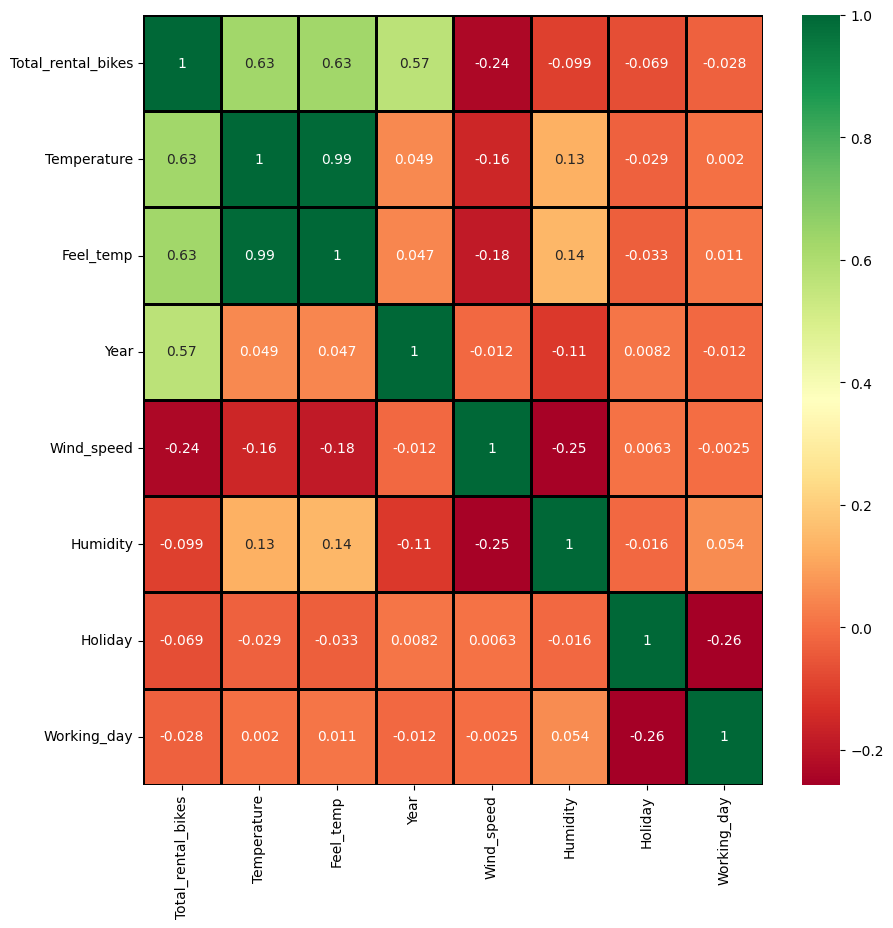

In [29]:
num_vars = ['Total_rental_bikes', 'Temperature', 'Feel_temp', 'Year', 'Wind_speed', 'Humidity', "Holiday", "Working_day"]
plt.figure(figsize=(10,10))
sns.heatmap(bike_dt[num_vars].corr(), annot=True, cmap= "RdYlGn", linewidths=1, linecolor='black')
plt.show()

***INSIGHTS:-***
- ***`From Heatmap, we understood that:`***
    - *`Target variable 'Total_rental_bikes'   has strong positive correlation with 'Temperature'(0.63), 'Feel Temperature'(0.63) and 'Year'(0.57).`*
    - *`Target variable 'Total_rental_bikes'   has negative correlation with 'Wind_Speed'(-0.24), 'Holiday'(-0.069), 'Working_day'(-0.028) and 'Humidity'(-0.099).`*

 ***` Pairplots to check the linearity with target variable - Total_rental_bikes`***



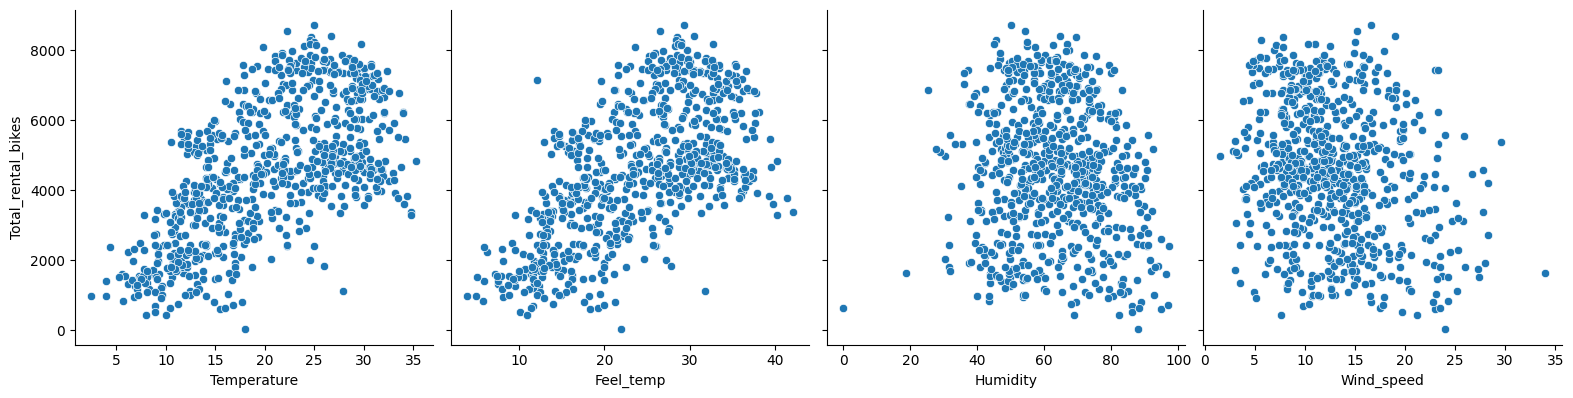

In [30]:
sns.pairplot(bike_dt, x_vars=['Temperature', 'Feel_temp', 'Humidity', 'Wind_speed'],
             y_vars='Total_rental_bikes', height=4)
plt.show()

***INSIGHTS:-***
- *`There is a linear relationship and strong positive correlation between Temperature, Feel_temp with 'Total_rental_bikes'`*
- *`There is no linear relationship and there is negative correlation between Humidity, Wind_speed with 'Total_rental_bikes'`*

In [31]:
bike_dt["Holiday"].replace({0: "No", 1: "Yes"}, inplace=True)

In [32]:
bike_dt["Holiday"].value_counts()

,count
Holiday,
No,709
Yes,21


In [33]:
bike_dt["Working_day"].replace({0: "No", 1: "Yes"}, inplace=True)

In [34]:
bike_dt["Working_day"].value_counts()

,count
Working_day,
Yes,504
No,226



***2.1.2 Categorical Columns***

***`Boxplot to check for any outliers`***

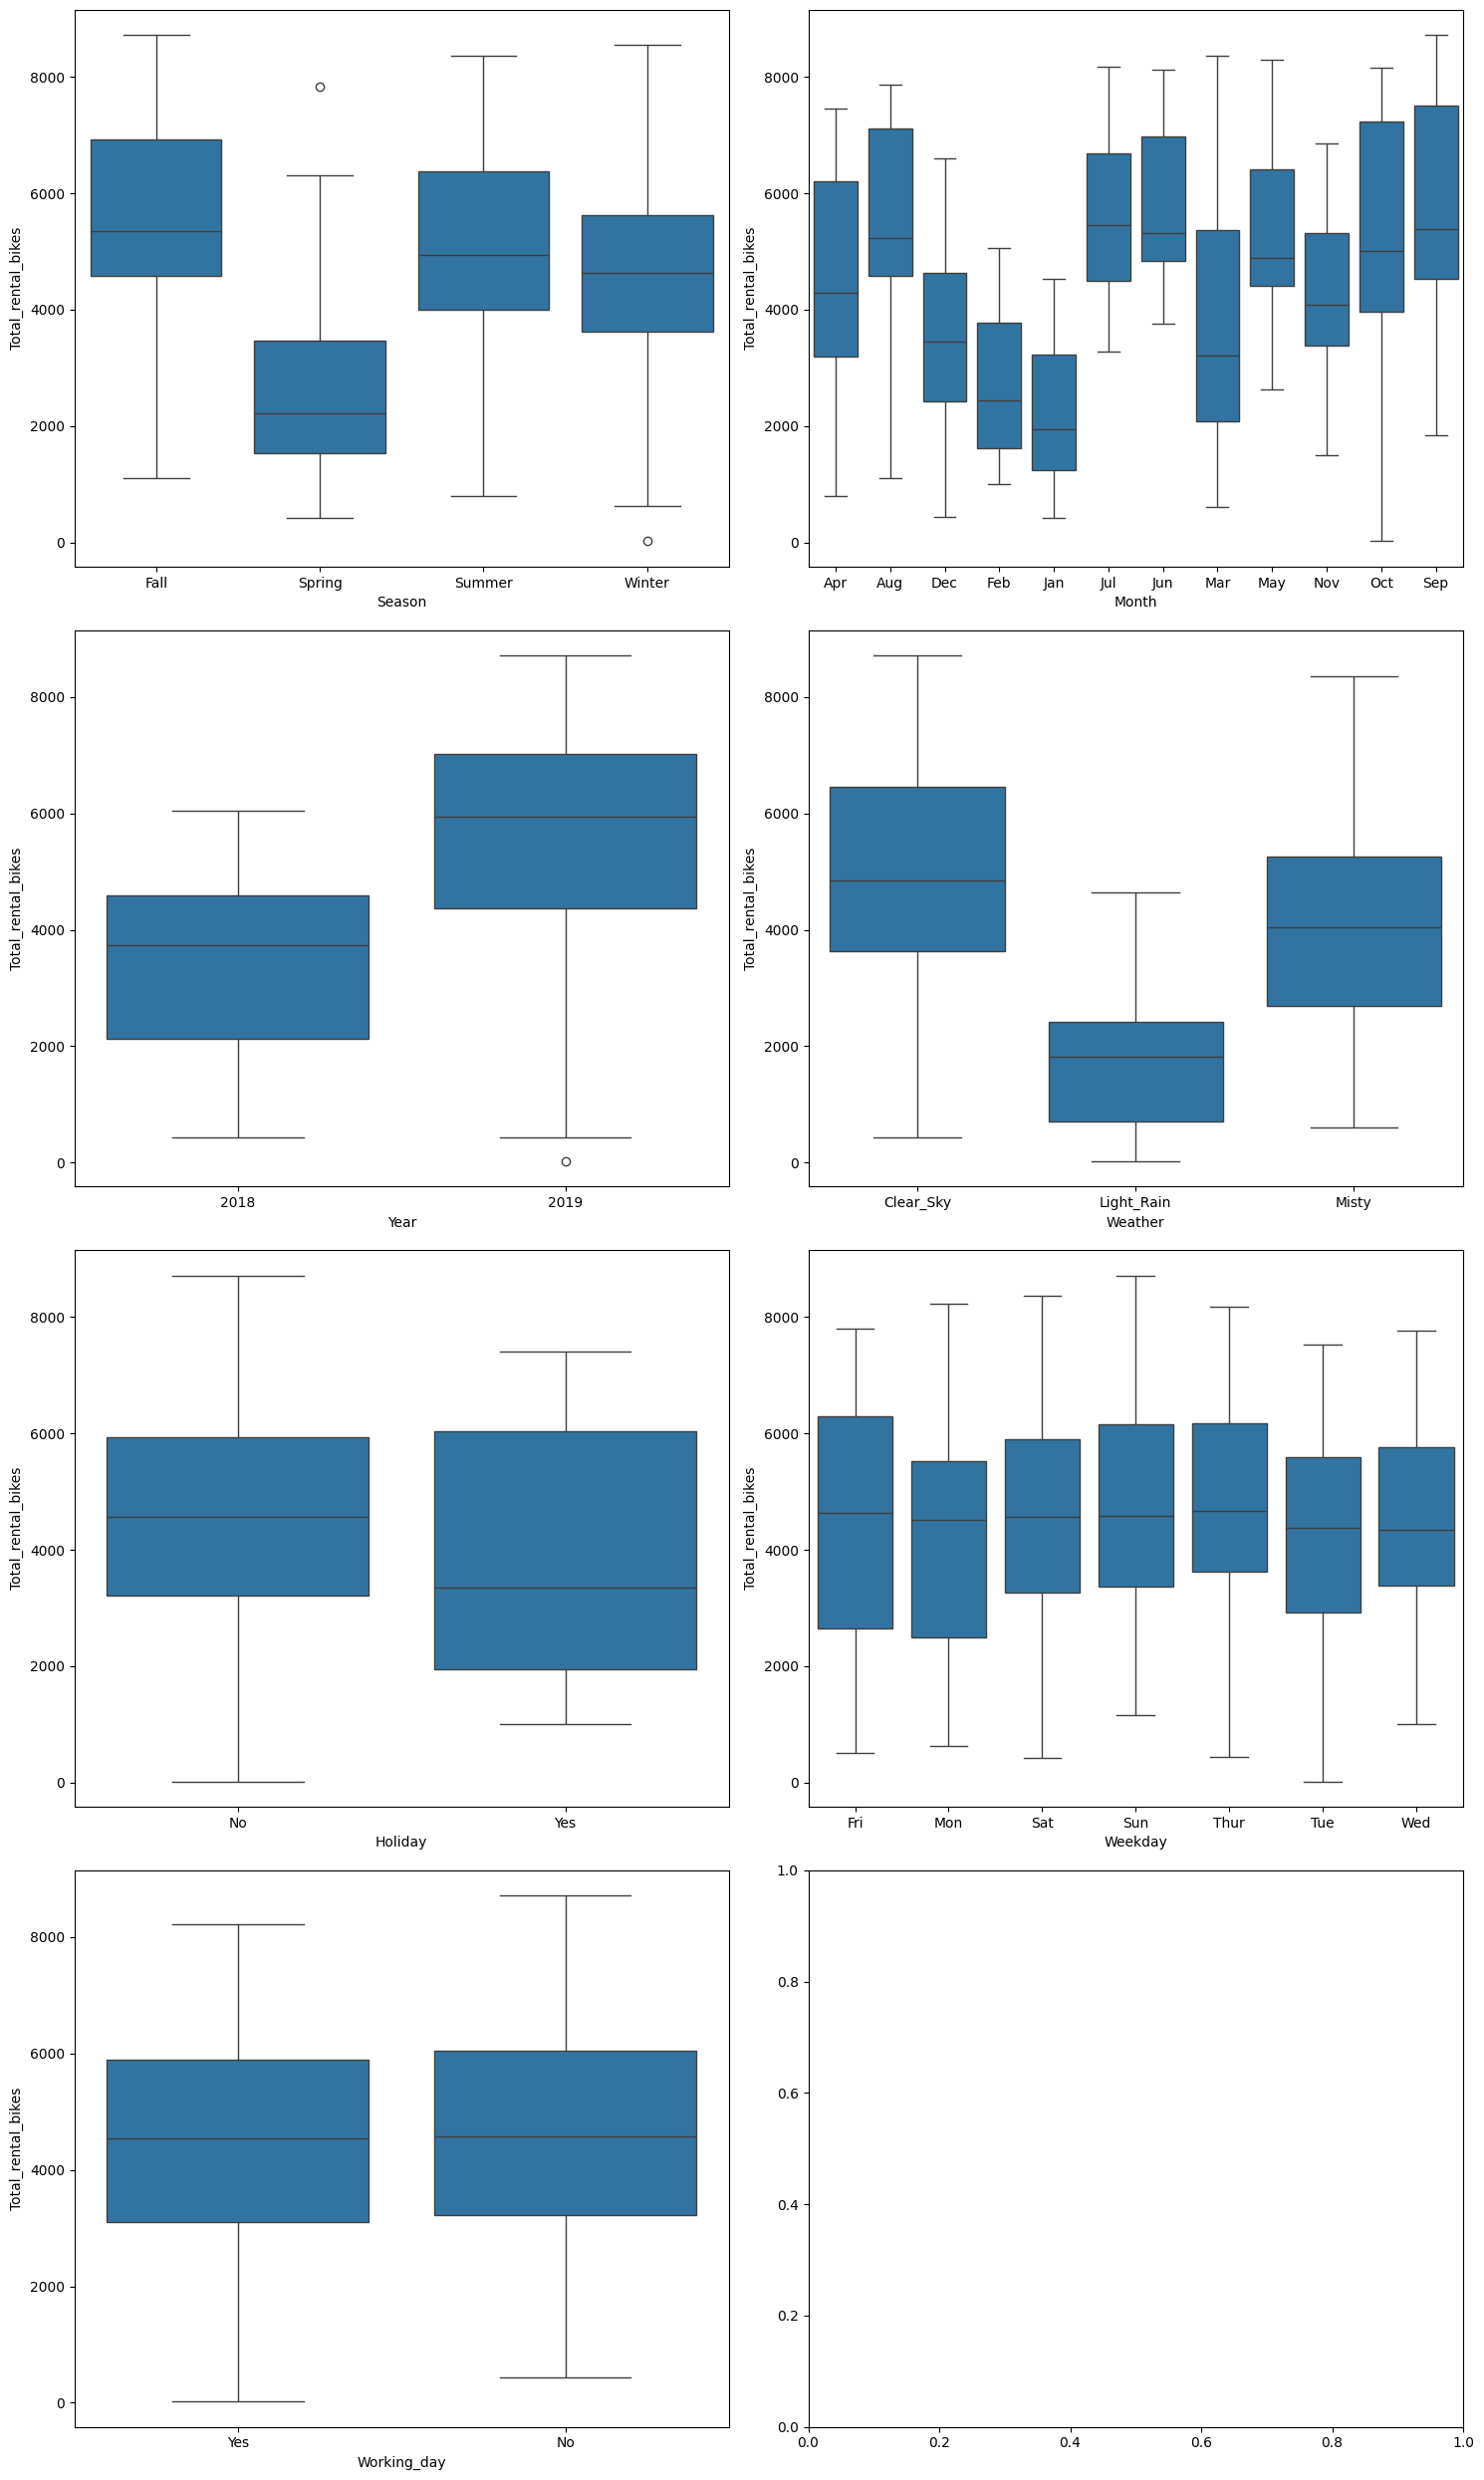

In [35]:
cols = ['Season', 'Month', 'Year', 'Weather', 'Holiday', 'Weekday', 'Working_day']
num_plots = len(cols)
num_rows = (num_plots + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 25))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.boxplot(x=col, y='Total_rental_bikes', data=bike_dt, ax=axes[i])
plt.tight_layout()
plt.show()

***`Barplot for categorical columns`***

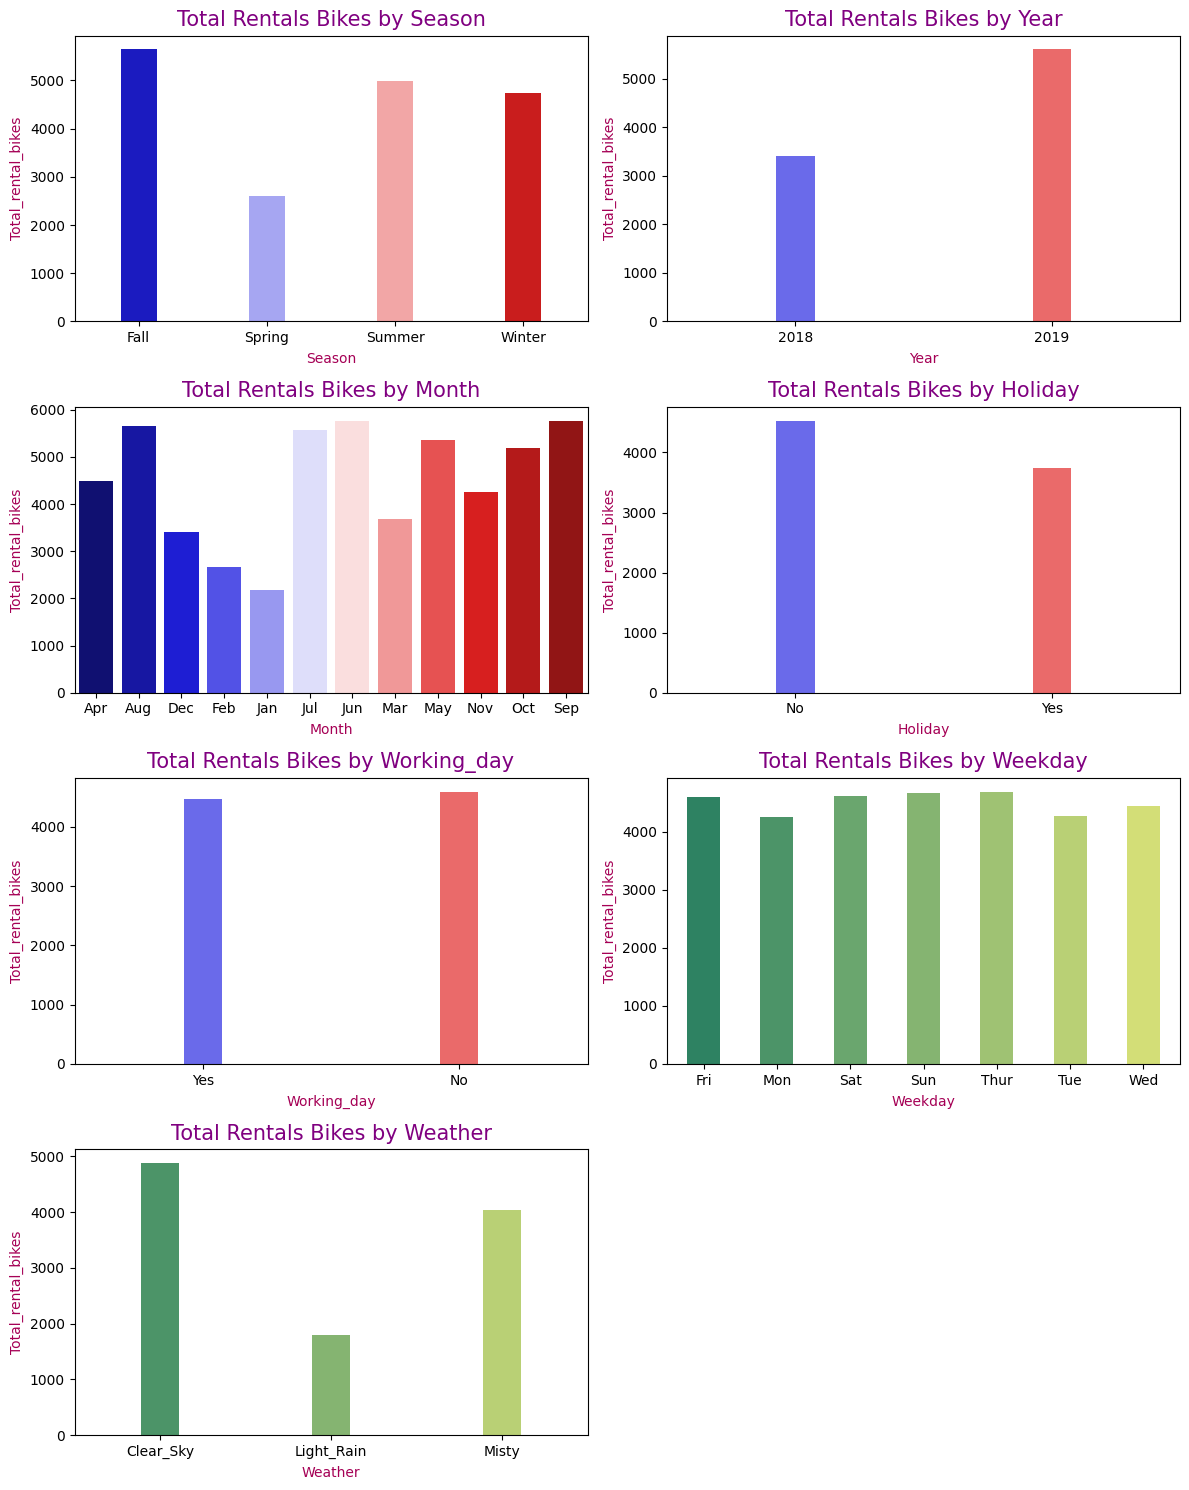

In [50]:
cols = ['Season', 'Year', 'Month', 'Holiday', 'Working_day', 'Weekday', 'Weather']
num_plots = len(cols)
num_rows = (num_plots + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 15))
axes = axes.flatten()
palettes = ["seismic", "seismic", "seismic", "seismic", "seismic", "summer", "summer"]
widths = [0.28, 0.15, None, 0.15, 0.15, 0.45, 0.22]

for i, col in enumerate(cols):
    sns.barplot(
        x=col,
        y='Total_rental_bikes',
        data=bike_dt,
        ax=axes[i],
        ci=None,
        palette=palettes[i],
        width=widths[i] if widths[i] is not None else 0.8
    )
    axes[i].set_title(f'Total Rentals Bikes by {col}',
                     {'size': 15, 'weight': 5, 'color': '#800080'},
                     pad=7)
    axes[i].set_xlabel(col, {'size': 10, 'weight': 5, 'color': '#a50055'}, labelpad = 5)
    axes[i].set_ylabel('Total_rental_bikes', {'size': 10, 'weight': 5, 'color': '#a50055'}, labelpad = 4)

for i in range(num_plots, num_rows * 2):
    fig.delaxes(axes[i])

for spine in ['top', 'right', 'bottom', 'left']:
    axes[i].spines[spine].set_linewidth(1)
    axes[i].spines[spine].set_color('#680018')

plt.tight_layout()
plt.show()

***INSIGHTS ON TARGET VARIABLE VS CATEGORICAL VARIABLES:-***

- *`Fall season is when most bikes are rented, followed by the summer and winter. Bike rentals significantly decreases during the spring.`*


- *`Bike rentals have increased from 2018 to 2019.`*

- *`From May to September, there is highest rental bike usage with dip in month of January, February & December.`*



- *`Bike rentals are higher on non-holiday days.`*

- *`Bike rentals are slightly higher on non-working days.`*


- *`Wednesday to Sunday has high demands than other days. People less prefer rented bike on Monday & Tuesday.`*

- *`Bike rentals are highest on clear sky days.
Rentals are slightly lower on light rain days and significantly lower on misty days. `*

***`Creating Dummy Variables for categorical columns`***

In [51]:
bike_dt = pd.get_dummies(data=bike_dt, columns=['Season', 'Month', 'Weekday', 'Holiday', 'Year', 'Working_day'],
                         drop_first=True, dtype = "int64")
bike_dt = pd.get_dummies(data=bike_dt, columns=['Weather'], dtype = "int64")

In [52]:
bike_dt.head()

,Temperature,Feel_temp,Humidity,Wind_speed,Total_rental_bikes,Season_Spring,Season_Summer,Season_Winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thur,Weekday_Tue,Weekday_Wed,Holiday_Yes,Year_2019,Working_day_Yes,Weather_Clear_Sky,Weather_Light_Rain,Weather_Misty
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [53]:
bike_dt.shape

(730, 31)

In [54]:
bike_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         730 non-null    float64
 1   Feel_temp           730 non-null    float64
 2   Humidity            730 non-null    float64
 3   Wind_speed          730 non-null    float64
 4   Total_rental_bikes  730 non-null    int64  
 5   Season_Spring       730 non-null    int64  
 6   Season_Summer       730 non-null    int64  
 7   Season_Winter       730 non-null    int64  
 8   Month_Aug           730 non-null    int64  
 9   Month_Dec           730 non-null    int64  
 10  Month_Feb           730 non-null    int64  
 11  Month_Jan           730 non-null    int64  
 12  Month_Jul           730 non-null    int64  
 13  Month_Jun           730 non-null    int64  
 14  Month_Mar           730 non-null    int64  
 15  Month_May           730 non-null    int64  
 16  Month_No

In [55]:
bike_dt.nunique()     ## gives info about unique values

,0
Temperature,498
Feel_temp,689
Humidity,594
Wind_speed,649
Total_rental_bikes,695
Season_Spring,2
Season_Summer,2
Season_Winter,2
Month_Aug,2
Month_Dec,2


# **3. Model Building**

***3.1 TEST-TRAIN DATA SPLIT***

In [56]:
## Importing libraries for Test - Train Data Split
import sklearn
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_dt, train_size = 0.7, test_size = 0.3, random_state = 100)

In [58]:
df_train.shape

(510, 31)

In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         510 non-null    float64
 1   Feel_temp           510 non-null    float64
 2   Humidity            510 non-null    float64
 3   Wind_speed          510 non-null    float64
 4   Total_rental_bikes  510 non-null    int64  
 5   Season_Spring       510 non-null    int64  
 6   Season_Summer       510 non-null    int64  
 7   Season_Winter       510 non-null    int64  
 8   Month_Aug           510 non-null    int64  
 9   Month_Dec           510 non-null    int64  
 10  Month_Feb           510 non-null    int64  
 11  Month_Jan           510 non-null    int64  
 12  Month_Jul           510 non-null    int64  
 13  Month_Jun           510 non-null    int64  
 14  Month_Mar           510 non-null    int64  
 15  Month_May           510 non-null    int64  
 16  Month_Nov   

In [60]:
df_test.shape

(219, 31)

In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         219 non-null    float64
 1   Feel_temp           219 non-null    float64
 2   Humidity            219 non-null    float64
 3   Wind_speed          219 non-null    float64
 4   Total_rental_bikes  219 non-null    int64  
 5   Season_Spring       219 non-null    int64  
 6   Season_Summer       219 non-null    int64  
 7   Season_Winter       219 non-null    int64  
 8   Month_Aug           219 non-null    int64  
 9   Month_Dec           219 non-null    int64  
 10  Month_Feb           219 non-null    int64  
 11  Month_Jan           219 non-null    int64  
 12  Month_Jul           219 non-null    int64  
 13  Month_Jun           219 non-null    int64  
 14  Month_Mar           219 non-null    int64  
 15  Month_May           219 non-null    int64  
 16  Month_Nov   

***3.2 RESCALING THE FEATURES***


- *`There are two common ways of rescaling:`*

  *`1. Min-Max scaling `*

  *`2. Standardisation (mean-0, sigma-1)`*

- *`We will use MinMax scaling.`*

In [62]:
## Apply scaler() to numerical columns except 'category' and 'dummy' variables.
scaler = MinMaxScaler()
num_vars = ['Total_rental_bikes', 'Temperature', 'Feel_temp', 'Wind_speed', 'Humidity']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [63]:
df_train.head()

,Temperature,Feel_temp,Humidity,Wind_speed,Total_rental_bikes,Season_Spring,Season_Summer,Season_Winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thur,Weekday_Tue,Weekday_Wed,Holiday_Yes,Year_2019,Working_day_Yes,Weather_Clear_Sky,Weather_Light_Rain,Weather_Misty
653,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [64]:
df_train.describe()

,Temperature,Feel_temp,Humidity,Wind_speed,Total_rental_bikes,Season_Spring,Season_Summer,Season_Winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thur,Weekday_Tue,Weekday_Wed,Holiday_Yes,Year_2019,Working_day_Yes,Weather_Clear_Sky,Weather_Light_Rain,Weather_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.025490,0.507843,0.711765,0.627451,0.029412,0.343137
std,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.157763,0.500429,0.453386,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
y_train = df_train.pop('Total_rental_bikes')
X_train = df_train

In [66]:
## Using RFE for Feature Selection with 15 features
lm = LinearRegression()
lm.fit(X_train, y_train)

## RFE Calculations
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [67]:
## Creating a list of features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Temperature', True, 1),
 ('Feel_temp', False, 7),
 ('Humidity', True, 1),
 ('Wind_speed', True, 1),
 ('Season_Spring', True, 1),
 ('Season_Summer', False, 3),
 ('Season_Winter', True, 1),
 ('Month_Aug', False, 11),
 ('Month_Dec', True, 1),
 ('Month_Feb', False, 2),
 ('Month_Jan', True, 1),
 ('Month_Jul', True, 1),
 ('Month_Jun', False, 15),
 ('Month_Mar', False, 16),
 ('Month_May', False, 8),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 13),
 ('Month_Sep', True, 1),
 ('Weekday_Mon', False, 10),
 ('Weekday_Sat', False, 5),
 ('Weekday_Sun', False, 6),
 ('Weekday_Thur', False, 14),
 ('Weekday_Tue', False, 9),
 ('Weekday_Wed', False, 12),
 ('Holiday_Yes', True, 1),
 ('Year_2019', True, 1),
 ('Working_day_Yes', False, 4),
 ('Weather_Clear_Sky', True, 1),
 ('Weather_Light_Rain', True, 1),
 ('Weather_Misty', True, 1)]

In [68]:
## Supported features by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Temperature', 'Humidity', 'Wind_speed', 'Season_Spring', 'Season_Winter', 'Month_Dec', 'Month_Jan', 'Month_Jul', 'Month_Nov', 'Month_Sep', 'Holiday_Yes', 'Year_2019', 'Weather_Clear_Sky', 'Weather_Light_Rain', 'Weather_Misty'], dtype='object')

In [69]:
## shape of the dataframe containing the features supported by RFE
rfe_col.shape

(15,)

In [70]:
## Unsupported features by RFE
X_train.columns[~rfe.support_]

Index(['Feel_temp', 'Season_Summer', 'Month_Aug', 'Month_Feb', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Oct', 'Weekday_Mon', 'Weekday_Sat', 'Weekday_Sun', 'Weekday_Thur', 'Weekday_Tue', 'Weekday_Wed', 'Working_day_Yes'], dtype='object')

In [71]:
X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,Temperature,Humidity,Wind_speed,Season_Spring,Season_Winter,Month_Dec,Month_Jan,Month_Jul,Month_Nov,Month_Sep,Holiday_Yes,Year_2019,Weather_Clear_Sky,Weather_Light_Rain,Weather_Misty
653,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,1,1,0,0
576,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,1,1,0,0
426,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0,0,1
728,0.245101,0.498067,0.663106,1,0,1,0,0,0,0,0,1,1,0,0
482,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,0,1,0,0,1


***3.3 DIVIDING INTO X AND Y TRAIN DATASETS FOR THE MODEL BUILDING***

**MODEL 1**



***`Creating the first Linear Regression Model`***

 - *`HIGH P-VALUE, HIGH VIF - Drop these variables`*
 - *`HIGH-LOW`*
   - *`HIGH P-VALUE, LOW VIF (Remove these first)`*
   - *`LOW P-VALUE, HIGH VIF (Remove these after the ones above)`*
 - *`LOW P-VALUE, LOW VIF - Keep these variables`*


In [72]:
## Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

## Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

## Check the parameters obtained
lr.params.sort_values(ascending=False)

,0
Temperature,0.434515
Year_2019,0.231228
const,0.197107
Weather_Clear_Sky,0.169430
Weather_Misty,0.112010
Season_Winter,0.073743
Month_Sep,0.056819
Month_Dec,-0.045533
Month_Nov,-0.049447
Month_Jan,-0.050695


In [73]:
## Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_rental_bikes   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          7.80e-189
Time:                        09:40:42   Log-Likelihood:                 511.10
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     495   BIC:                            -928.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1971      0

In [74]:
#VIF Calculations
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = "VIF", ascending = False)

,Features,VIF
12,Weather_Clear_Sky,39.67
14,Weather_Misty,27.32
13,Weather_Light_Rain,3.77
0,Temperature,3.48
3,Season_Spring,2.75
4,Season_Winter,2.34
1,Humidity,1.90
8,Month_Nov,1.70
6,Month_Jan,1.64
5,Month_Dec,1.45


*`We will remove 'Weather_Misty' due to its very high 'VIF' value since all variables have p-values < 0.05. Despite Weather_Misty having the second highest VIF, we will retain 'Weather_Clear_Sky' as it could impact bike rentals significantly.`*

**MODEL 2**

 ***` Dropping the 'Weather_Misty' and updating the model`***

In [75]:
X_train_rfe.drop("Weather_Misty", inplace=True, axis=1)

In [76]:
X_train_rfe.shape

(510, 14)

In [77]:
## Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

## Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

## Check the parameters obtained
lr.params.sort_values(ascending=False)

,0
Temperature,0.434515
const,0.309117
Year_2019,0.231228
Season_Winter,0.073743
Weather_Clear_Sky,0.057420
Month_Sep,0.056819
Month_Dec,-0.045533
Month_Nov,-0.049447
Month_Jan,-0.050695
Month_Jul,-0.072012


In [78]:
## Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_rental_bikes   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          7.80e-189
Time:                        09:41:11   Log-Likelihood:                 511.10
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     495   BIC:                            -928.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3091      0

In [79]:
#VIF Calculations
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = "VIF", ascending = False)

,Features,VIF
0,Temperature,19.36
1,Humidity,19.13
2,Wind_speed,4.16
12,Weather_Clear_Sky,3.28
3,Season_Spring,3.14
4,Season_Winter,3.03
11,Year_2019,2.07
8,Month_Nov,1.83
6,Month_Jan,1.76
5,Month_Dec,1.56


*`We will remove 'Humidity' due to its very high 'VIF' value since all variables have p-values < 0.05. Despite 'Humidity' having the second highest VIF, we will retain 'Temperature' as it could impact bike rentals significantly.`*

**MODEL 3**

***` Dropping the 'Humidity' and updating the model`***

In [80]:
X_train_rfe.drop("Humidity", inplace=True, axis=1)

In [81]:
X_train_rfe.shape

(510, 13)

In [82]:
## Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

## Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

## Check the parameters obtained
lr.params.sort_values(ascending=False)

,0
Temperature,0.402583
Year_2019,0.234795
const,0.208137
Weather_Clear_Sky,0.081190
Season_Winter,0.064977
Month_Sep,0.053670
Month_Nov,-0.048827
Month_Dec,-0.050984
Month_Jan,-0.055626
Month_Jul,-0.064343


In [83]:
## Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_rental_bikes   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          1.08e-186
Time:                        09:41:38   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2081      0

In [84]:
#VIF Calculations
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = "VIF", ascending = False)

,Features,VIF
0,Temperature,5.39
1,Wind_speed,4.07
11,Weather_Clear_Sky,2.85
3,Season_Winter,2.53
2,Season_Spring,2.44
10,Year_2019,2.07
7,Month_Nov,1.81
5,Month_Jan,1.63
4,Month_Dec,1.46
6,Month_Jul,1.34


*`We will remove 'Wind_speed' due to its very high 'VIF' value since all variables have p-values < 0.05. Also 'Wind_speed' has negative correlation with bike_retals and second highest VIF, so we will retain 'Temperature' as it could impact bike rentals significantly.`*

**FINAL MODEL - MODEL 4**

***`Dropping the 'Wind_speed' and updating the model`***

In [85]:
X_train_rfe.drop("Wind_speed", inplace=True, axis=1)

In [86]:
X_train_rfe.shape

(510, 12)

In [87]:
## Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

## Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

## Check the parameters obtained
lr.params.sort_values(ascending=False)

,0
Temperature,0.434268
Year_2019,0.233434
const,0.139103
Weather_Clear_Sky,0.079850
Season_Winter,0.073955
Month_Sep,0.062304
Month_Jan,-0.038007
Month_Dec,-0.040001
Month_Nov,-0.049116
Month_Jul,-0.062045


In [90]:
## Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_rental_bikes   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.9
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          4.48e-180
Time:                        09:43:04   Log-Likelihood:                 484.75
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     497   BIC:                            -888.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1391      0

In [89]:
#VIF Calculations
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = "VIF", ascending = False)

,Features,VIF
0,Temperature,3.93
10,Weather_Clear_Sky,2.82
2,Season_Winter,2.50
9,Year_2019,2.06
1,Season_Spring,2.04
6,Month_Nov,1.79
4,Month_Jan,1.63
3,Month_Dec,1.46
5,Month_Jul,1.32
7,Month_Sep,1.20


***INSIGHTS:-***
 - *`In this model, VIF is acceptable, the p-value < 0.05 for all the variables, and the R2 score is 82.6%. Thus, this model can be accepted.`*

***3.4 RESIDUAL ANALYSIS OF THE TRAIN DATA***



***3.4.1 Checking if the error terms are normally distributed with mean zero (not X, Y) (which is infact, one of the assumptions of linear regression), plotting the histogram of the error terms.***

In [91]:
y_train_pred = lr.predict(X_train_lm)

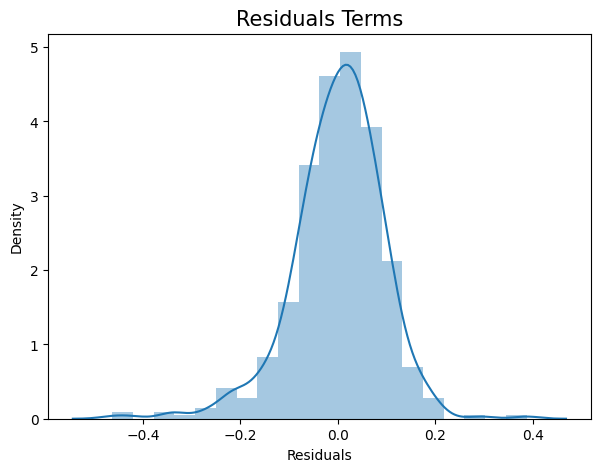

In [92]:
## Residual calculations
res = y_train - y_train_pred

## Distplot of the error terms(Residuals)
fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
plt.title('Residuals Terms', fontsize = 15)
plt.xlabel('Residuals', fontsize = 10)
plt.show()

***INSIGHTS:-***

- *`From the above plot, we could see that the Residuals are normally distributed with mean zero (not X, Y). Hence our assumption for Linear Regression is valid.`*

Text(0, 0.5, 'Residuals')

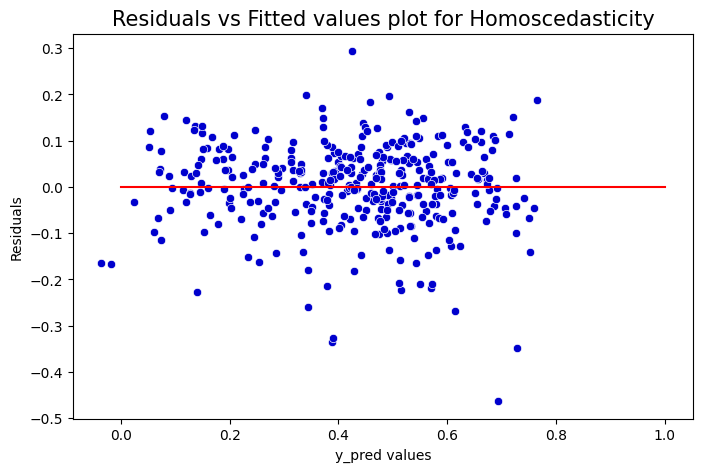

In [93]:
## Homoscedasticity Check
plt.figure(figsize = [8,5])
res.index = range(0, len(res))
df = pd.DataFrame({'y_train_pred': y_train_pred, 'res': res})
p = sns.scatterplot(data=df, x='y_train_pred', y='res', color = "#0000CD")
p = sns.lineplot(x=[0,1], y=[0,0], color='red')
p = plt.title('Residuals vs Fitted values plot for Homoscedasticity', fontsize = 15)
plt.xlabel('y_pred values')
plt.ylabel('Residuals')

***INSIGHTS:-***

- *`From the above plot, we can see that residuals have almost constant variance.`*

***3.4.2 Applying the scaling on the test sets***
- *`Never fit() on test data only tranform()`*

In [94]:
## Apply scaler() to all numeric variables in test dataset.
num_vars = ['Total_rental_bikes', 'Temperature', 'Feel_temp', 'Wind_speed', 'Humidity']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [95]:
## variables after scaling the test data
df_test.head()

,Temperature,Feel_temp,Humidity,Wind_speed,Total_rental_bikes,Season_Spring,Season_Summer,Season_Winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thur,Weekday_Tue,Weekday_Wed,Holiday_Yes,Year_2019,Working_day_Yes,Weather_Clear_Sky,Weather_Light_Rain,Weather_Misty
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
535,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [96]:
df_test.describe()

,Temperature,Feel_temp,Humidity,Wind_speed,Total_rental_bikes,Season_Spring,Season_Summer,Season_Winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thur,Weekday_Tue,Weekday_Wed,Holiday_Yes,Year_2019,Working_day_Yes,Weather_Clear_Sky,Weather_Light_Rain,Weather_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.036530,0.479452,0.639269,0.652968,0.027397,0.319635
std,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.188034,0.500722,0.481313,0.477117,0.163612,0.467403
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***`3.4.3 Dividing into X_test and y_test`***

In [97]:
y_test = df_test.pop('Total_rental_bikes')
X_test = df_test

In [98]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         219 non-null    float64
 1   Feel_temp           219 non-null    float64
 2   Humidity            219 non-null    float64
 3   Wind_speed          219 non-null    float64
 4   Season_Spring       219 non-null    int64  
 5   Season_Summer       219 non-null    int64  
 6   Season_Winter       219 non-null    int64  
 7   Month_Aug           219 non-null    int64  
 8   Month_Dec           219 non-null    int64  
 9   Month_Feb           219 non-null    int64  
 10  Month_Jan           219 non-null    int64  
 11  Month_Jul           219 non-null    int64  
 12  Month_Jun           219 non-null    int64  
 13  Month_Mar           219 non-null    int64  
 14  Month_May           219 non-null    int64  
 15  Month_Nov           219 non-null    int64  
 16  Month_Oct   

***3.5 MAKING PREDICTIONS ON OUR MODEL***

In [99]:
## Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

## Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [100]:
X_test_new.head()

,const,Temperature,Season_Spring,Season_Winter,Month_Dec,Month_Jan,Month_Jul,Month_Nov,Month_Sep,Holiday_Yes,Year_2019,Weather_Clear_Sky,Weather_Light_Rain
184,1.0,0.831783,0,0,0,0,1,0,0,1,0,0,0
535,1.0,0.901354,0,0,0,0,0,0,0,0,1,1,0
299,1.0,0.511964,0,1,0,0,0,0,0,0,0,0,0
221,1.0,0.881625,0,0,0,0,0,0,0,0,0,1,0
152,1.0,0.817246,0,0,0,0,0,0,0,0,0,1,0


In [101]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               219 non-null    float64
 1   Temperature         219 non-null    float64
 2   Season_Spring       219 non-null    int64  
 3   Season_Winter       219 non-null    int64  
 4   Month_Dec           219 non-null    int64  
 5   Month_Jan           219 non-null    int64  
 6   Month_Jul           219 non-null    int64  
 7   Month_Nov           219 non-null    int64  
 8   Month_Sep           219 non-null    int64  
 9   Holiday_Yes         219 non-null    int64  
 10  Year_2019           219 non-null    int64  
 11  Weather_Clear_Sky   219 non-null    int64  
 12  Weather_Light_Rain  219 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 24.0 KB


In [102]:
## Making predictions
y_test_pred = lr.predict(X_test_new)

Text(0, 0.5, 'y_test_pred')

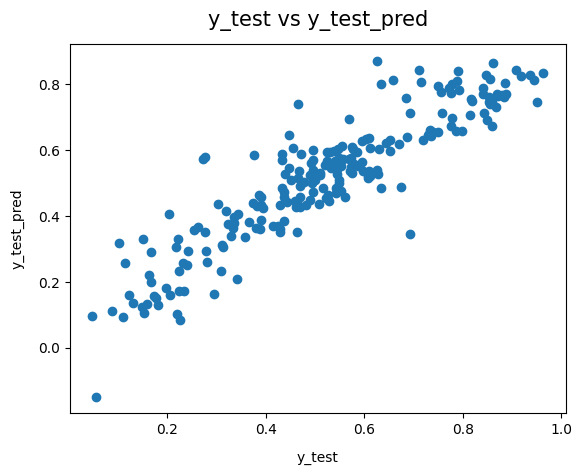

In [103]:
## Plotting y_test & y_test_pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_test_pred', fontsize = 15, pad = 13)
plt.xlabel('y_test', fontsize = 10, labelpad = 10)
plt.ylabel('y_test_pred', fontsize = 10, labelpad = 10)

***INSIGHTS:-***
- *`There is linear relationship between y_test and y_test_pred`*

***3.6 FINAL MODEL INTERPRETATION***

**`Hypothesis Testing:`**
- *`H0: β0 = 0`*
- *`H1: β1 != 0`*

*`const:                  0.1391`*

*`Temperature:            0.4343`*

*`Season_Winter:          0.0740`*

*`Month_Sep:         0.0623`*

*`Year_2019:              0.2334`*

*`Weather_Clear_Sky:      0.0798`*

*`Season_Spring:        -0.1072`*

*`Month_Dec:             -0.0400`*

*`Month_Jan:            -0.0380`*

*`Month_Jul:            -0.0620`*

*`Month_Nov:            -0.0491`*

*`Holiday_Yes:           -0.0937`*

*`Weather_Light_Rain:    -0.2285`*

***INSIGHTS:-***
- *`From the Model, it is evident that all coefficients are not equal to zero. So, We REJECT the NULL HYPOTHESIS.`*

- *`F Statistics : Higher the F-Statistics, more significant the Model is.`*

- *`F-statistic: 196.9`*
- *`Prob (F-statistic): 4.48e-180`*
- *`The F-Statistics value of 196.9 (which is greater than 1) and the p-value < '~0.05' states that the overall model is significant.`*

# **4. Model Evaluation**

***4.1 CALCULATING R² SCORE - TEST AND TRAIN DATASET***

In [104]:
## R² score - Test Dataset
r2_test = r2_score(y_test, y_test_pred)

## R² score - Train Dataset
r2_train = r2_score(y_train, y_train_pred)

print('The R² of Final Model on Train Dataset is:', round(r2_train, 3)*100)
print('The R² of Final Model on Test Dataset is:', round(r2_test, 3)*100)

The R² of Final Model on Train Dataset is: 82.6
The R² of Final Model on Test Dataset is: 82.1


***INSIGHTS:-***
- *`The R² of Final Model on Train & Test Dataset is pretty much close which is an indication of good model.`*

***4.2 CALCULATING ADJUSTED R² SCORE - TEST AND TRAIN DATASET***

In [105]:
# m - no. of rows in X_test
# n - no. of features/predictors in X_test
m = X_test.shape[0]
n = X_test.shape[1]

# Adjusted R² - Test Dataset
adjusted_r2_test = 1-(1-r2_test)*(m-1)/(m-n-1)

# a - no. of rows in X_train
# b - no. of features/predictors in X_train
a = X_train.shape[0]
b = X_train.shape[1]

# Adjusted R² - Train Dataset
adjusted_r2_train = 1-(1-r2_train)*(a-1)/(a-b-1)

print('Adjusted R² - Test Dataset:', round((adjusted_r2_test*100), 2))
print('Adjusted R² - Train Dataset:', round((adjusted_r2_train*100), 2))

Adjusted R² - Test Dataset: 79.22
Adjusted R² - Train Dataset: 81.53


***INSIGHTS:-***
- *`The Adjusted R² of Final Model on Train & Test Dataset is pretty much close which is an indication of good model.`*

***4.3 FINAL RESULT COMPARISON:***

***`Test data R² : 82.1`***

***`Train data R² : 82.6`***

***`Test data adjusted R² : 79.22`***

***`Train data adjusted R² : 81.53`***

***`This seems to be a really good model that can very well 'Generalize' various datasets.`***

# **5. Conclusion**

***`As per final Model, the below predictor variables influences bike rental booking:`**
- ***`Temperature:`*** *`A coefficient of '0.4343' indicates that a unit increase in Temperature increases the bike rentals by 0.4343 units.`*

- ***`Year_2019:`*** *`A coefficient of '0.2334' indicates that a unit increase in Year_2019 increases the bike rentals by 0.2334 units.`*

- ***`Weather_Clear_Sky:`*** *`A coefficient of '0.0798' indicates that a unit increase in Weather_Clear_Sky increases the bike rentals by 0.2334 units.`*

- ***`Season_Winter:`*** *`A coefficient of '0.0740' indicates that a unit increase in Season_Winter increases the bike rentals by 0.0740 units.`*

- ***`Month_Sep:`*** *`A coefficient of '0.0623' indicates that a unit increase in Month_Sep increases the bike rentals by 0.0623 units.`*

- ***`Month_Jan:`*** *`A coefficient of '-0.0380' indicates that a unit decreases in Month_Jan decreases the bike rentals by -0.0380 units.`*

- ***`Month_Dec:`*** *`A coefficient of '-0.0400' indicates that a unit decreases in Month_Dec decreases the bike rentals by -0.0400 units.`*

- ***`Month_Nov:`*** *`A coefficient of '-0.0491' indicates that a unit decreases in Month_Nov decreases the bike rentals by -0.0491 units.`*

- ***`Month_Jul:`*** *`A coefficient of '-0.0620' indicates that a unit decreases in Month_Jul decreases the bike rentals by -0.0620 units.`*

- ***`Holiday_Yes:`*** *`A coefficient of '-0.0937' indicates that a unit decreases in Holiday_Yes decreases the bike rentals by -0.0937 units.`*

- ***`Season_Spring:`*** *`A coefficient of '-0.1072' indicates that a unit decreases in Season_Spring decreases the bike hire by -0.1072 units.`*

- ***`Weather_Light_Rain:`*** *`A coefficient of '-0.2285' indicates that a unit decreases in Weather_Light_Rain decreases the bike rentals by -0.2285 units.`*

***`OVERALL:`***

 - *`Bike rentals are influenced by seasonal factors, with warmer months seeing higher demand.`*
 - *`Weekends and holidays seem to have a negative impact on bike rentals.`*
 - *`Clear weather is preferred for bike rentals.`*

***`POTENTIAL RECOMMENDATIONS:`***

 - *`Marketing: Focus on promoting bike rentals during the peak seasons (Summer and Fall) and on weekdays.`*
 - *`Pricing: Consider offering discounts during off-peak seasons (Spring and Winter) and on holidays to stimulate demand.`*
 - *`Infrastructure: Strategize in improving bike paths and weather protection like providing rain gear or offering discounts to make bike rentals more convenient and accessible in all weather conditions.`*

 - *`Partnerships: Collaborate with local businesses, hotels, and attractions to offer joint promotions and packages.`*

- *`Customer Loyalty Programs: Implement loyalty programs to reward repeat customers and encourage repeat business.`*

- *`User Experience: Focus on improving the overall user experience, from booking and pickup to drop-off. This could include streamlined processes, easy-to-use apps, and well-maintained bikes.`*




***`BY IMPLEMENTING THESE RECOMMENDATIONS,  BoomBikes CAN INCREASE THEIR CUSTOMER BASE AND BOOST REVENUE.`***